# 1.4 Transforming Variables

In this section, we will see how to transform and combine existing variables to obtain new variables. Our examples are drawn from a data set of house prices in Ames, Iowa.  This data set is stored in a tab-separated values file.  For more information about the variables in this data set, please refer to the [data documentation](https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt).

**Alex's Note**: Documentation for this notebook

* NumPy (API reference): https://numpy.org/doc/stable/reference/index.html#reference
    * Math functions: https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.math.html, 
    * or  https://numpy.org/doc/stable/reference/routines.math.html
                      
* pandas.Series.map(): https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html
* pandas.Series.transform(): https://pandas.pydata.org/docs/reference/api/pandas.Series.transform.html




In [2]:
%matplotlib inline
import pandas as pd
pd.options.display.max_rows = 10

df = pd.read_csv("../data/AmesHousing.txt", sep="\t")
df.head()

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0        0       5    2010       WD           Normal     215000  
1        0       6    2010       WD           Normal     105000  
2    12500       6    2010       WD           Normal     172000  
3        0       4    2010       WD           Normal     244000  
4        0       3    2010       WD           Normal     189900  

[5 rows x 82 columns]

In [7]:
len(df.columns)

df["Lot Area"]


0       31770
1       11622
2       14267
3       11160
4       13830
        ...  
2925     7937
2926     8885
2927    10441
2928    10010
2929     9627
Name: Lot Area, Length: 2930, dtype: int64

## Applying Transformations

### Quantitative Variables

There are several reasons to transform quantitative variables, including:

1. to change the measurement units
2. to make the variable more amenable to analysis

As an example of the first reason, suppose we want the lot areas to be in square _yards_ instead of square feet. This requires dividing each lot area by 9. We can _broadcast_ the division over the entire `Series`.

In [9]:
## yards in an acre

acre = 4840

In [11]:
d = {"a":1, "b":4}

d["c"]= 5

d

{'a': 1, 'b': 4, 'c': 5}

In [10]:
df["Lot Area"] / (9*acre)

0       0.729339
1       0.266804
2       0.327525
3       0.256198
4       0.317493
          ...   
2925    0.182208
2926    0.203972
2927    0.239692
2928    0.229798
2929    0.221006
Name: Lot Area, Length: 2930, dtype: float64

If we want to store the results as a new variable in the `DataFrame`, we simply assign the `Series` to a new column in the `DataFrame`. The command below does two things: creates a new column in the `DataFrame` called "Lot Area Sq Yd" _and_ populates it with the values from the `Series` above.

In [12]:
df["Lot Area Sq Yd"] = df["Lot Area"] / 9

In [13]:
df["LotAcreage"] = df["Lot Area Sq Yd"]/acre

In [14]:
df[["Lot Area Sq Yd", "LotAcreage"]]

Lot Area Sq Yd  LotAcreage
0        3530.000000    0.729339
1        1291.333333    0.266804
2        1585.222222    0.327525
3        1240.000000    0.256198
4        1536.666667    0.317493
...              ...         ...
2925      881.888889    0.182208
2926      987.222222    0.203972
2927     1160.111111    0.239692
2928     1112.222222    0.229798
2929     1069.666667    0.221006

[2930 rows x 2 columns]

The other main reason for transforming quantitative variables is to make them more amenable to analysis. To see why a variable might not be amenable to analysis, let's take a look at a histogram of lot areas.

<AxesSubplot:ylabel='Frequency'>

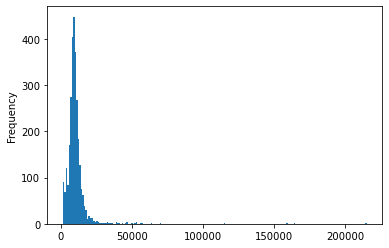

In [20]:
df["Lot Area"].plot.hist(bins=200)

<AxesSubplot:ylabel='Frequency'>

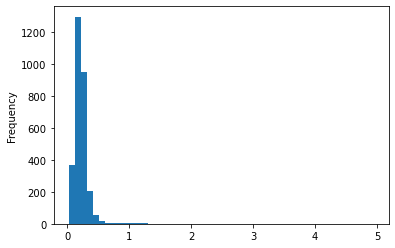

In [17]:
df["LotAcreage"].plot.hist(bins=50)

There are a few homes with such extreme lot areas that we get virtually no resolution at the lower end of the distribution. More than 95% of the observations are represented by one bin on this histogram. In other words, this variable is extremely **right-skewed**.

We could improve this histogram slightly by using more bins. But this does not solve the fundamental problem: we need more resolution at the lower end of the scale and less resolution at the higher end. One way to spread out the values at the lower end of a distribution and to compress the values at the higher end is to take the logarithm (provided that all the values are positive). Log transformations are particularly effective at dealing with right-skewed data.

The log function is not built into Python or `pandas`. We have to import the log function from a library called `numpy`, which contains many functions and data structures for numerical computations. In fact, `pandas` is built on top of `numpy`. When we apply `numpy`'s `log` function to a `pandas` `Series`, the function is automatically broadcast over the elements of the `Series`, returning another `Series`. Let's save the results to a variable called "log(Lot Area)".

In [24]:
import numpy as np
df["log(Lot Area)"] = np.log(df["Lot Area"])
df["log(Lot Area)"]

0       10.366278
1        9.360655
2        9.565704
3        9.320091
4        9.534595
          ...    
2925     8.979291
2926     9.092120
2927     9.253496
2928     9.211340
2929     9.172327
Name: log(Lot Area), Length: 2930, dtype: float64

In [23]:
np.log(np.array([45,34,2.777]))

array([3.80666249, 3.52636052, 1.02137121])

These numbers are not very interpretable on their own, but if we make a histogram of these values, we see that the lower end of the distribution is now more spread out, and the extreme values are not so extreme anymore.

<AxesSubplot:ylabel='Frequency'>

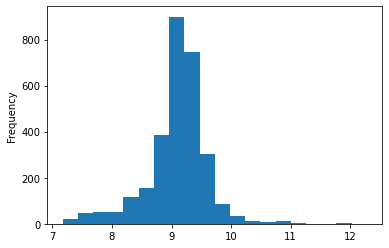

In [26]:
df["log(Lot Area)"].plot.hist(bins=20)

Sometimes a log transformation overcorrects for skew. For example, the "SalePrice" variable is also right-skewed.

In [27]:
df["SalePrice"]

0       215000
1       105000
2       172000
3       244000
4       189900
         ...  
2925    142500
2926    131000
2927    132000
2928    170000
2929    188000
Name: SalePrice, Length: 2930, dtype: int64

<AxesSubplot:ylabel='Frequency'>

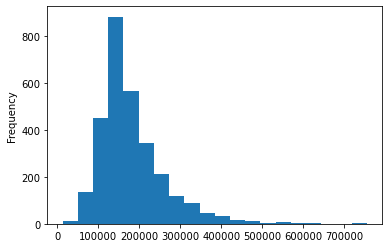

In [28]:
df["SalePrice"].plot.hist(bins=20)

But if we take logs, the distribution becomes somewhat left-skewed. Can we find a transformation that makes the resulting distribution more symmetric?

<AxesSubplot:ylabel='Frequency'>

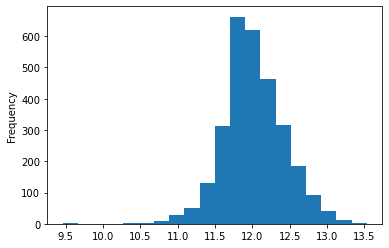

In [29]:
np.log(df["SalePrice"]).plot.hist(bins=20)

In fact, log is just one transformation on a scale of power transformations (which the statistician John Tukey called the **ladder of powers**):

$$ x(\lambda) = \begin{cases} x^\lambda & \lambda > 0 \\  \log(x) & \lambda = 0 \\ -x^\lambda & \lambda < 0 \end{cases} $$

$\lambda = 1$ corresponds to our original distribution. As we decrease $\lambda$, the distribution becomes more left-skewed (which is useful if the original distribution is right-skewed). Since log ($\lambda = 0$) was an overcorrection, let's back off and increase $\lambda$ a bit.

<AxesSubplot:ylabel='Frequency'>

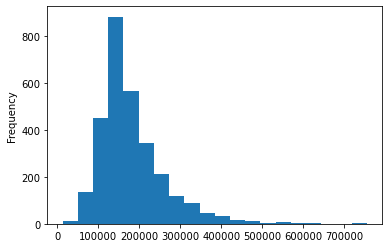

In [30]:
(df["SalePrice"]).plot.hist(bins=20)

<AxesSubplot:ylabel='Frequency'>

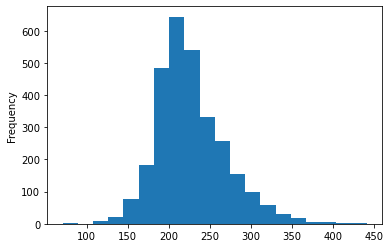

In [34]:
(df["SalePrice"] ** .45).plot.hist(bins=20)

This seems to be better. We can move $\lambda$ up and down the ladder until the distribution is the shape we want.

### Why $\lambda = 0$ corresponds to log (Optional)

You might have noticed that it does not make any sense to try the transformation $x^0$ for $\lambda = 0$, since anything raised to the zero power equals 1. But why is $\log(x)$ the right function to replace of $x^0$?

The answer has to do with calculus. We want to understand the behavior of $x^\lambda$ as $\lambda$ approaches 0. To do this properly, we actually need to consider the function

$$\frac{x^\lambda - 1}{\lambda}.$$

But the $-1$ and $1/\lambda$ are just constants that shift and scale the distribution; the shape of the histogram will be the same, regardless of whether we use $x^\lambda$ or $(x^\lambda - 1) / \lambda$. 

It turns out the limit of the above function as $\lambda$ approaches 0 is:

$$\lim_{\lambda \to 0} \frac{x^\lambda - 1}{\lambda} = \log(x).$$

(Challenge: prove this!) This is why it makes sense to slot $\log(x)$ in for $x^0$.

### Other Mathematical Functions in Numpy (Optional)

You might wonder what other mathematical functions are available in `numpy` besides `log`. For one, there is `log10`, which implements the base-10 logarithm. (By default, `np.log` is the natural logarithm, base-$e$.) 

[Here is an exhaustive list of the mathematical functions](https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.math.html). All of these functions are compatible with `pandas`.

### Categorical Variables

Categorical variables also sometimes require transformation, although for different reasons than quantitative variables. With categorical variables, the values are usually labels, so it does not make sense to take logarithms or to raise them to powers. However, we might want to change the labels of the categories.

For example, according to the [data documentation](https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt), the categorical variable "Heating QC" (heating quality and condition) in the Ames data set has five categories: excellent, good, average/typical, fair, and poor.

In [35]:
df["Heating QC"]

0       Fa
1       TA
2       TA
3       Ex
4       Gd
        ..
2925    TA
2926    TA
2927    TA
2928    Gd
2929    Ex
Name: Heating QC, Length: 2930, dtype: object

The labels for these categories are currently "Ex", "Gd", "TA", "Fa", and "Po", which might be cryptic to a reader. We might want to rename these labels to give them more descriptive names. This requires a transformation.

To do this, we can use the `.map()` method of `Series`. This method takes a dictionary as input. The dictionary specifies the mapping between the current labels and the desired labels. So, for example, if we want all instances of "Ex" to be replaced by "Excellent", we would add the key "Ex" to this dictionary, with a value of "Excellent".

In [43]:
df["Heating QCV"] = df["Heating QC"].map({
    "Ex": "1: Excellent",
    "Gd": "2: Good",
    "TA": "3: Average",
    "Fa": "4: Fair",
    "Po": "5: Poor"
})

<AxesSubplot:>

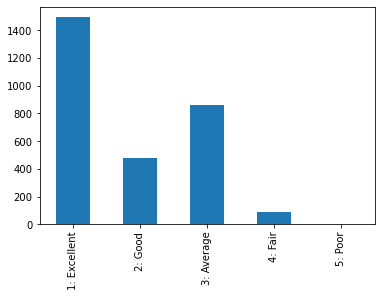

In [44]:
df["Heating QCV"].value_counts().sort_index().plot.bar()

Now when we make a bar chart, the labels will come out correctly. We just have to make sure they come out in the order we want.

<AxesSubplot:>

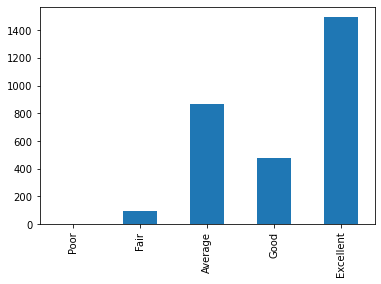

In [5]:
df["Heating QC"].map({
       "Ex": "Excellent",
       "Gd": "Good",
       "TA": "Average",
       "Fa": "Fair",
       "Po": "Poor"
}).value_counts()[["Poor", "Fair", "Average", "Good", "Excellent"]].plot.bar()

Transformations of categorical variables are not always merely cosmetic. For example, we may want to combine categories. The code below turns heating quality into a binary categorical variable (acceptable / unacceptable) based on whether the heating quality is at least average:

<AxesSubplot:ylabel='Heating QC Binary'>

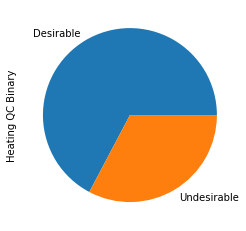

In [49]:
df["Heating QC Binary"] = df["Heating QC"].map({
       "Ex": "Desirable",
       "Gd": "Desirable",
       "TA": "Undesirable",
       "Fa": "Undesirable",
       "Po": "Undesirable"
})

df["Heating QC Binary"].value_counts().plot.pie()

The binary variable contains less information than the original variable, but we may not need the finer-grained detail about the heating, if all we want to know is whether it is acceptable or not. 

<AxesSubplot:ylabel='Heating QC'>

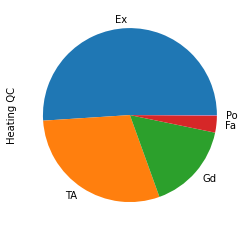

In [52]:
df["Heating QC"].value_counts().plot.pie()

In [7]:
df["Heating QC Binary"].value_counts()

Acceptable      2835
Unacceptable      95
Name: Heating QC Binary, dtype: int64

## Combining Variables

We can also create new variables out of several variables. For example, in the current data set, the information about when a house was sold is spread across two variables, "Yr Sold" and "Mo Sold" (1-12 indicating the month). We can combine these two variables into one, by dividing the month the house was sold by 12 and then adding that to the year. So for example, this new variable would equal 2010.5 if the house was sold in June 2010 and 2006.75 if it was sold in September 2006.

In [8]:
df["Date Sold"] = df["Yr Sold"] + df["Mo Sold"] / 12
df["Date Sold"]

0       2010.416667
1       2010.500000
2       2010.500000
3       2010.333333
4       2010.250000
           ...     
2925    2006.250000
2926    2006.500000
2927    2006.583333
2928    2006.333333
2929    2006.916667
Name: Date Sold, Length: 2930, dtype: float64

Notice how the division by 12 is _broadcast_ over the elements of the `Series`, and the addition of the two `Series` is elementwise.

Another example of a variable that can be derived from two existing variables is the _cost per square foot_, which is a common way to compare prices of different-sized homes. To calculate the cost per square foot of a home, we can simply divide the two `Series`, and the division will be elementwise.

In [53]:
df[["SalePrice", "Gr Liv Area"]]

SalePrice  Gr Liv Area
0        215000         1656
1        105000          896
2        172000         1329
3        244000         2110
4        189900         1629
...         ...          ...
2925     142500         1003
2926     131000          902
2927     132000          970
2928     170000         1389
2929     188000         2000

[2930 rows x 2 columns]

In [54]:
df["Cost per Sq Ft"] = df["SalePrice"] / df["Gr Liv Area"]
df["Cost per Sq Ft"]

0       129.830918
1       117.187500
2       129.420617
3       115.639810
4       116.574586
           ...    
2925    142.073779
2926    145.232816
2927    136.082474
2928    122.390209
2929     94.000000
Name: Cost per Sq Ft, Length: 2930, dtype: float64

# Exercises

**Exercise 1.** What happens if you leave out a category in the dictionary that you pass to `.map()`?

In [ ]:
# ENTER YOUR CODE HERE

**Explain your answer here**:

Exercises 2-4 deal with the Ames housing data set from earlier. Refer to the [data documentation](https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt) if you have any trouble finding or understanding a variable in this data set.

**Exercise 2.** The number of bathrooms is typically reported as a decimal to allow for half bathrooms (i.e., bathrooms without a shower). In this data set, the number of full bathrooms and the number of half bathrooms are separate variables. Create a new variable with the number of bathrooms in each home.

In [ ]:
# ENTER YOUR CODE HERE

**Exercise 3.** Create a categorical variable that indicates whether or not a home has a pool.

In [ ]:
# ENTER YOUR CODE HERE

**Exercise 4.** There are four types of utilities: electricity, gas, water, and sewage. Right now, the combination of utilities in a home is encoded in a single variable called "Utilities". Convert this variable into four boolean variables, each one indicating whether or not a home has a particular utility.

In [ ]:
# ENTER YOUR CODE HERE

Exercises 5-7 deal with the Tips data set (`../data/tips.csv`).

**Exercise 5.** Make a visualization that shows the distribution of the total bills. Transform the variable first so that it is approximately symmetric.

In [ ]:
# ENTER YOUR CODE HERE

**Exercise 6.** Suppose the total bill + tip are divided evenly among the people in each party. Which party paid the most _per person_?

In [ ]:
# ENTER YOUR CODE HERE

**Exercise 7.** Make a visualization that shows how busy the restaurant is by day. Your visualization should display the full name of each day, i.e., "Thursday" instead of "Thur".

In [1]:
# ENTER YOUR CODE HERE

**Submission Instructions**

Submit this notebook using the following `handin` command:

        handin dekhtyar 301-lab04 <File>